<a href="https://colab.research.google.com/github/Jessie-Grewal/Neur265/blob/main/coding_homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #5

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw5.csv</code> and <code>acc_fa_hw5.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code> and <code>acc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array. 

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex. Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). The task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> variable contains LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> variable contains LFP surrounding these false alarms. So, you have two arrays - one array with LFP recorded during correct choices (hits), and one array with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as <code>acc_hits</code> and <code>acc_fa</code>, with equally spaced values between "zero" and "four" (the length of each trial, in seconds). 

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in one subplot, and the first trial of <code>acc_fa</code> in another subplot. Plot your <code>time</code> variable on the x-axis. Label your axes.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation (in Hz) in the LFP might be. Does this differ between the first trial of <code>acc_hits</code> and the first trial of <code>acc_fa</code>? 

10. We want to have some way to compare LFPs between the two conditions (hits and false alarms). One way to do this might be to compute an event-related potential (ERP) to see if there are structural changes surrounding screen touch for either of the two conditions. In a new *Code Cell*, calculate and plot the ERP for <code>acc_hits</code>. Put <code>time</code> on the x-axis. Put a vertical black line at the "two" position on the x-axis (the screen touch occurred 2 seconds into the sample on each trial). Put a horizontal black line at the "zero" position on the y-axis. Label your axes.

11. In a new *Markdown Cell*, interpret your ERP for hits. Do you see any evidence of consistent activity in the LFP surrounding screen touch (vertical black bar)? 

12. Repeat step 10 for <code>acc_fa</code>. Plot your ERP for <code>acc_fa</code> and your ERP for <code>acc_hits</code> in one plot, with <code>time</code> on the x-axis. Make a vertical and horizontal black bar on your plot (as outlined in step 10), and label your axes. 

13. In a new *Markdown Cell*, interpret your plot from step 12. Are there any differences in the ERPs between hits and false alarms? 

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_5.ipynb</code>.

### Jessie Grewal

_Neur 265: Intro to Neural Data Analysis_

Date: __3-31-2023__

In [1]:
#  imports numpy any matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# imports acc_hits and acc_fa as numpy arrays
url1 = 'https://raw.githubusercontent.com/Jessie-Grewal/Neur265/main/acc_hits_hw5.csv'
url2 = 'https://raw.githubusercontent.com/Jessie-Grewal/Neur265/main/acc_fa_hw5.csv'

acc_hits = np.loadtxt(url1, delimiter = ',')
acc_fa = np.loadtxt(url2, delimiter = ',')

In [3]:
# prints the shape of each array
print(acc_hits.shape)
print(acc_fa.shape)

(24, 8001)
(19, 8001)


In [4]:
# create variable called time that has the same length as acc_hits and acc_fa, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).
time = np.linspace(0, 4, 8001)
print(time)

[0.0000e+00 5.0000e-04 1.0000e-03 ... 3.9990e+00 3.9995e+00 4.0000e+00]


In [34]:
#  create an expression to determine the sampling rate of the data
sample_rate = acc_hits.shape[1]/4
print(sample_rate)

2000.25


Text(0.5, 1.0, 'Acc_fa Voltage over Time')

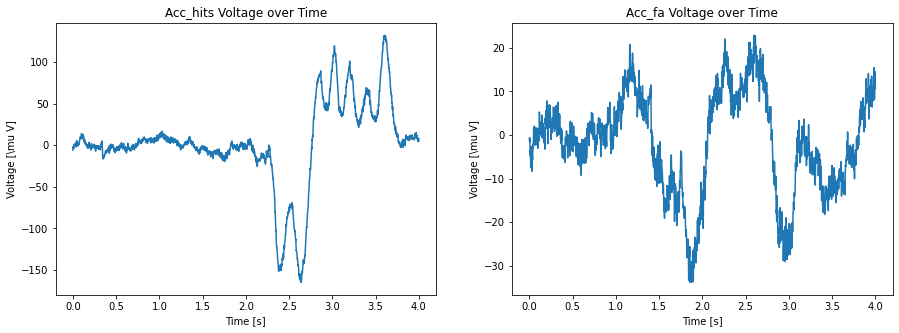

In [21]:
# plot the first trial of acc_hits in one subplot and the first trial of acc_fa in another subplot
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(time, acc_hits[0])
ax[0].set_xlabel('Time [s]')              # Label the x-axis as time.
ax[0].set_ylabel('Voltage [\mu V]')       # Label the y-axis as voltage.
ax[1].plot(time,acc_fa[0])
ax[1].set_xlabel('Time [s]')              # Label the x-axis as time.
ax[1].set_ylabel('Voltage [\mu V]')       # Label the y-axis as voltage.
ax[0].set_title('Acc_hits Voltage over Time')
ax[1].set_title('Acc_fa Voltage over Time')


In the first trial of Acc_hits, it appears that the dominant oscillation in the LFP is about 5 Hz given that if you focus in on the 3-4 second time interval, there are 5 peaks. On the other hand, it appears that the dominant oscillation in the first trial of acc-fa is about 2 Hz given that in the 2-3 second time interval, there appear to be 2 peaks. 

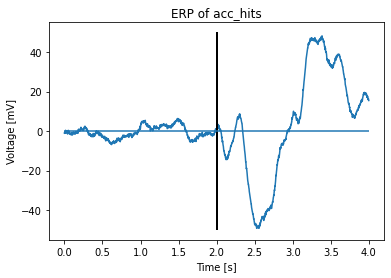

In [32]:
# calculate and plot the ERP for acc_hits; Put a vertical black line at the "two" position on the x-axis; Put a horizontal black line at the "zero" position on the y-axis.
plt.plot(time, acc_hits.mean(0))
plt.xlabel('Time [s]')          
plt.ylabel('Voltage [mV]')
plt.title('ERP of acc_hits') 
plt.vlines(2, -50, 50, 'k', lw=2)               # Indicate stimulus onset with line
plt.hlines(0, time[0], time[-1])
 

The ERP for hits indicates that when the stimulus is presented 2 seconds into the sample on each trial, there is a consistent response in which the voltage decreases and then increases slightly within 0.25 seconds of the stimulus before there is a more drastric response between 0.5 to 1.5 seconds following the stimulus. 

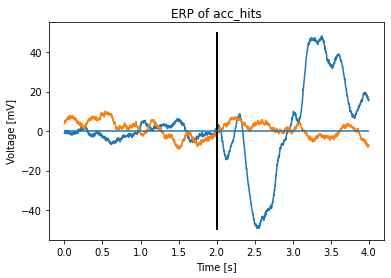

In [33]:
# calculate and plot the ERP for acc_fa; Plot  ERP for acc_fa and ERP for acc_hits in one plot; Make a vertical bar at position two on the x-axis and a horizontal black bar on the y-axis
plt.plot(time, acc_hits.mean(0))
plt.plot(time, acc_fa.mean(0))
plt.xlabel('Time [s]')          
plt.ylabel('Voltage [mV]')
plt.title('ERP of acc_hits') 
plt.vlines(2, -50, 50, 'k', lw=2)               
plt.hlines(0, time[0], time[-1])

The ERP for false alarms indicates that there is not as significant of a response following the stimulus as one would see in the ERP for hits. There is a slight increse in  voltage that lasts approximately 0.5 seconds following the stimulus in the ERP for false alarms, but there is no significant change from baseleine as is present in the ERP for hits.  